<center><font color= "green">PUBG Game Prediction</font></center>

<center><img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExZG9vYTkxNG43bzhxOGdnd29pdWozcWk0NnNncGpqa3RramJnZmZveSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/7iscZVCg0r1oYAqNdl/giphy.gif"></center>

## Table Content
1. [Importing libraries](#import)
2. [Reading of the data](#read)

# Importing Libraries<a class="anchor" id="import"></a>

In [1]:
import numpy as np
import pandas as pd
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[16,6]
import seaborn as sns

#handling warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
!pip install catboost


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import catboost as cb

In [5]:
#score checking
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# <font color="green">Reading The Data <a class="import" id="read"></a>

In [6]:
#load data
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\ml geeks\\pubg game project\\PUBG_Game_Prediction_data.csv\\PUBG_Game_Prediction_data.csv")

In [7]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
df.shape

(4446966, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Data Descritption

- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# <center><b>Data Wrangling</b></center>

# Check for the rows with missing win prediction value

In [10]:
k=df[df["winPlacePerc"].isnull()].index

In [11]:
# remove the data row
df.drop(k,inplace=True)

## understanding Players distribution in a game


In [12]:
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')


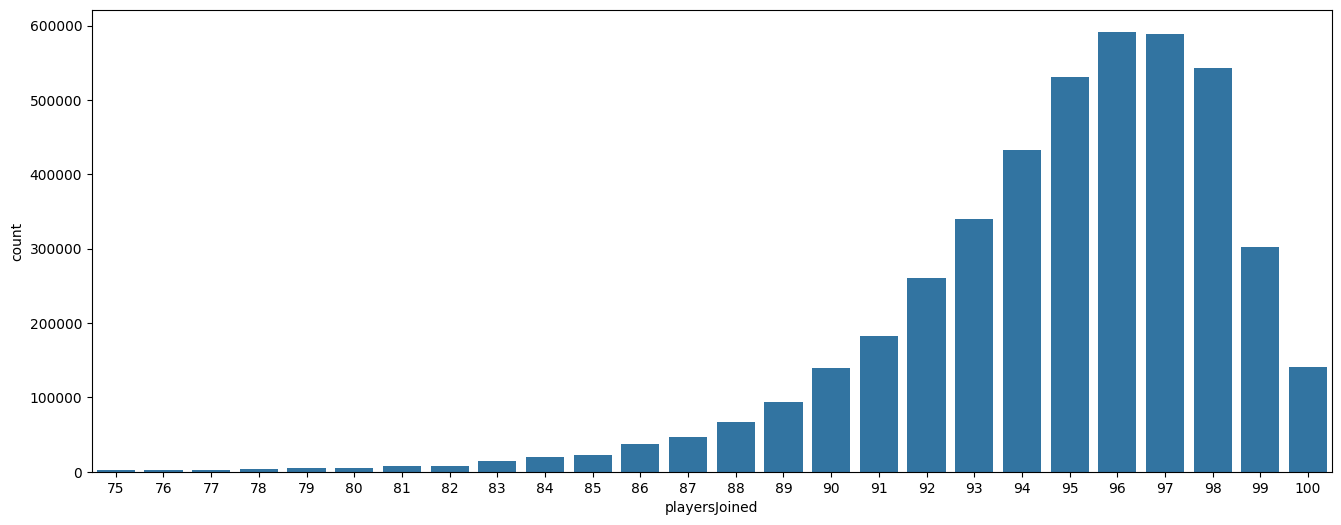

In [13]:


# Pre-aggregate
agg = df[df['playersJoined'] >= 75]['playersJoined'].value_counts().reset_index()
agg.columns = ['playersJoined', 'count']

# Sort if desired
agg = agg.sort_values('playersJoined')

# Plot
sns.barplot(data=agg, x='playersJoined', y='count')
plt.show()


# analysing the Data

<center><img src="https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExbzc5MmNqcHRlN25wY2d6dTIwNHBnanBqaTlxYTdxY2c1aHplMjQ3byZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/BntVzxNAY0XMwAV365/giphy.gif"></center>

In [14]:
df["TotalDistance"]=df['rideDistance']+df['walkDistance']+df['swimDistance']
df["killswithoutMoving"]= ((df['kills']>0) & (df['TotalDistance']==0))

In [15]:
df[df["killswithoutMoving"]==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,TotalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [16]:
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

# <b>Extra-ordinary Road Kills???</b>

<center><img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExMnkzdmp1bXVnaHN0ejg0ZWsxZDJ2dGMwNnkzMGVycTN3emlkdGIxdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/qlCFjkSruesco/giphy.gif"</center>

In [17]:
df[df['roadKills']>5].shape

(46, 32)

In [18]:
df.drop(df[df['roadKills']>5].index,inplace=True)

# soo many kills

<center><img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExNTRzZjNybGp6enI2MndpNnBxNml5N256eHcxaG0weWgxaXRscDN4bSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3oKIPyfMtdG2XIYMtW/giphy.gif"></center>

In [19]:
agg=df["kills"].value_counts().reset_index()

In [20]:
agg.columns=["Number_of_kills","count_of_players"]

In [21]:
agg = agg.sort_values('Number_of_kills')

<Axes: xlabel='Number_of_kills', ylabel='count_of_players'>

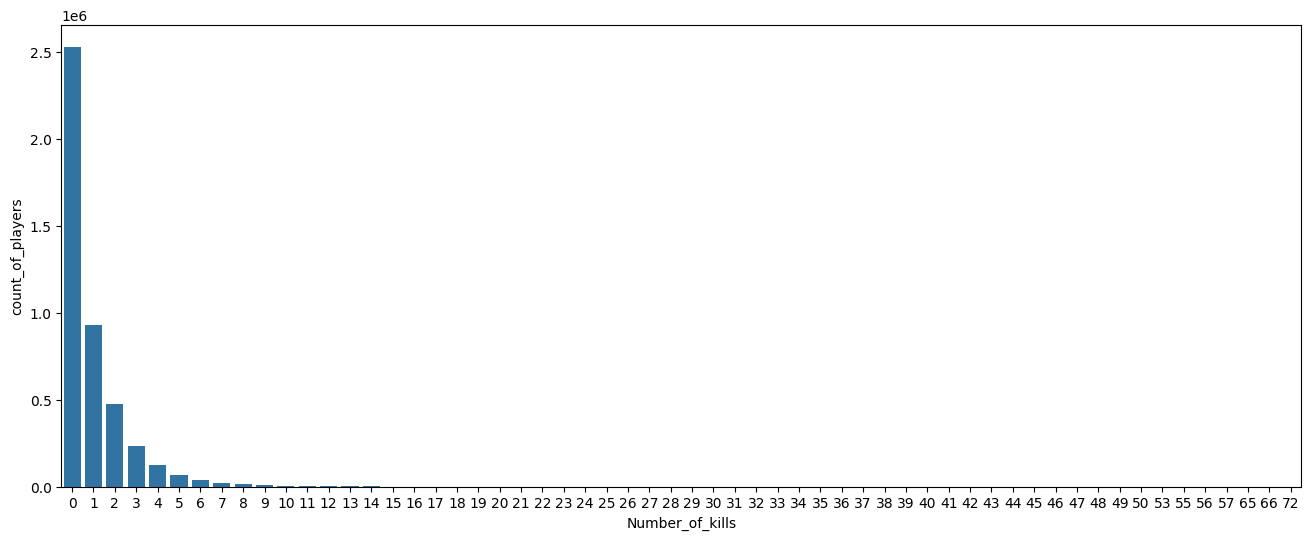

In [22]:
sns.barplot(data=agg,x='Number_of_kills',y="count_of_players")

In [23]:
#dropping the instances where kills is greater than 20
df.drop(df[df["kills"]>=20].index,inplace=True)

# HeadShot

<center><img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExY2J2bHZ2ajBvb2M1aDRzbnd4MHM3MmRwbDZmZWp3MnYzZDZwdzgzYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xUNd9GNQ7BLwMGSzVS/giphy.gif"</center>

In [24]:
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

In [25]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,TotalDistance,killswithoutMoving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0


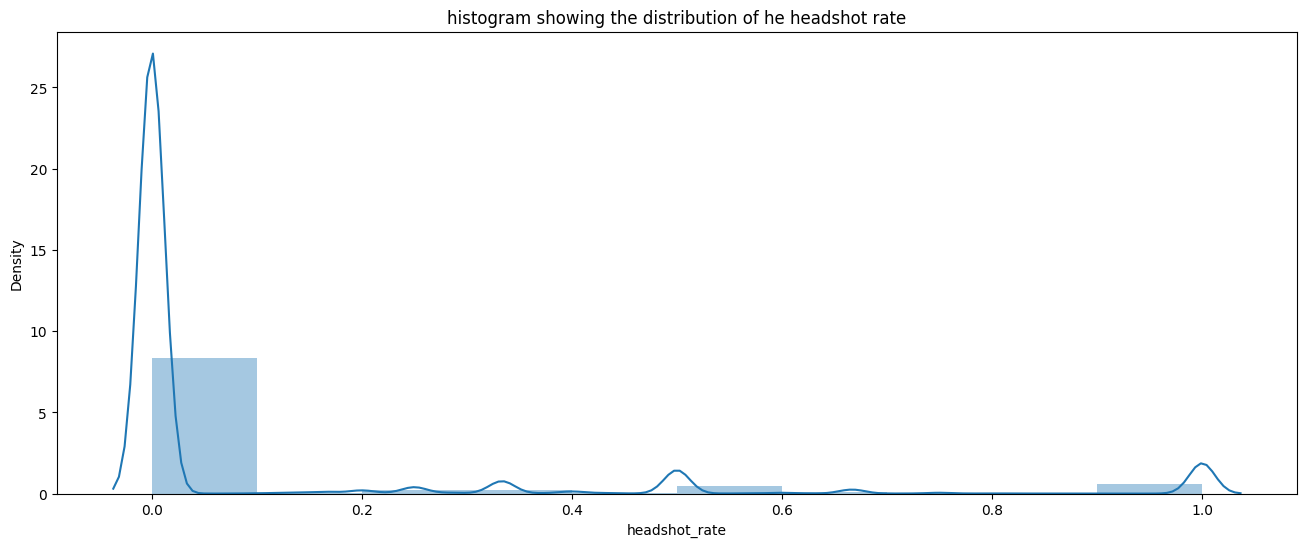

In [26]:
#plot the headshot rate distribution
sns.distplot(df['headshot_rate'],bins=10).set_title("histogram showing the distribution of he headshot rate")
plt.show()

In [27]:
df[(df['headshot_rate']==1)&(df['kills']>5)].shape

(187, 33)

In [28]:
df.drop(df[(df['headshot_rate']==1)&(df['kills']>6)].index,inplace=True)

# <center>Longest Kills</center>

<center><img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExYzg5ODE2MGl2c20zOTRvMjNidGExYTBmc2c0YzVtdGJ2MzRwMnltNyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3ohjUVTmHNP3MKVLos/giphy.gif"></center>

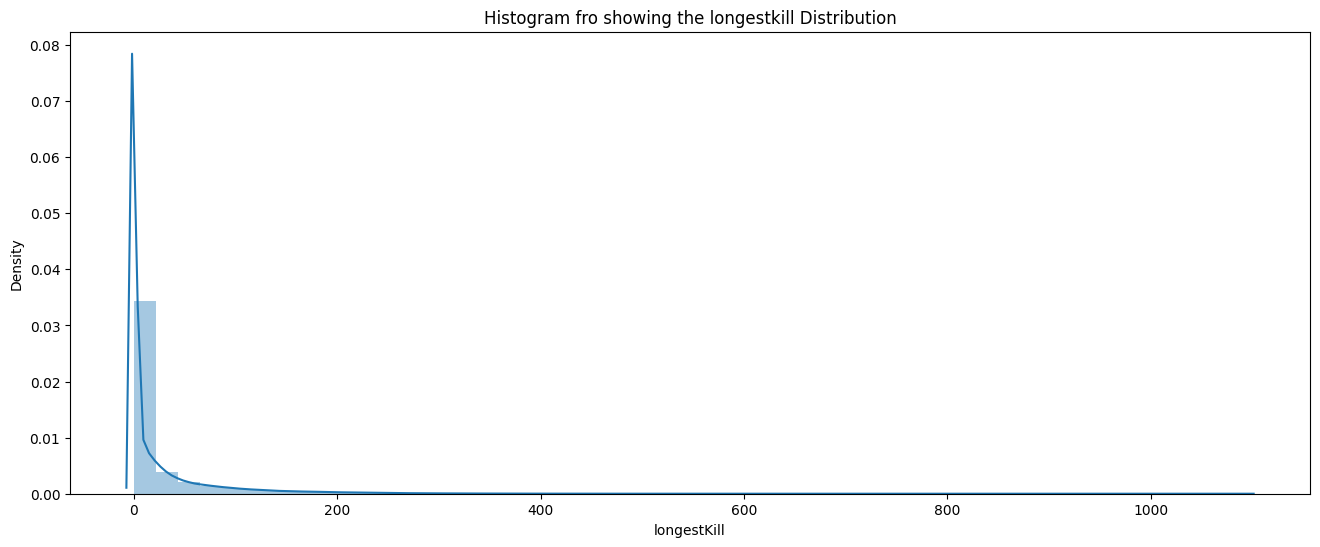

In [29]:
sns.distplot(df['longestKill'],bins=50).set_title("Histogram fro showing the longestkill Distribution")
plt.show()

In [30]:
df[df['longestKill']>=500].shape

(1744, 33)

In [31]:
df.drop(df[df['longestKill']>=500].index,inplace=True)

Weapon Change

 <center><img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZHhnYnlpdHc4NGxmdXNrYnQzY29pbjdrc2hkZ3BlazZsamN2ZXYyOSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/93hVNoTJ2gEBhQ0jLO/giphy.gif"> </enter>

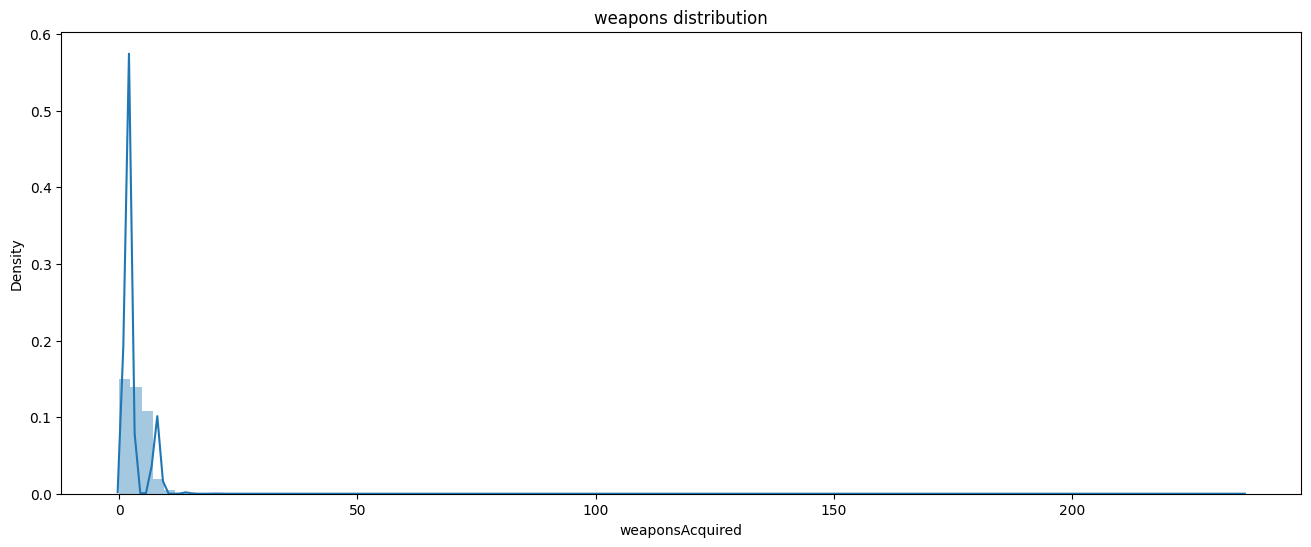

In [32]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title("weapons distribution")
plt.show()

In [33]:
df[df['weaponsAcquired']>=15].shape

(6755, 33)

In [34]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

EDA

In [35]:
df.shape

(4436269, 33)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436269 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   groupId             object 
 2   matchId             object 
 3   assists             int64  
 4   boosts              int64  
 5   damageDealt         float64
 6   DBNOs               int64  
 7   headshotKills       int64  
 8   heals               int64  
 9   killPlace           int64  
 10  killPoints          int64  
 11  kills               int64  
 12  killStreaks         int64  
 13  longestKill         float64
 14  matchDuration       int64  
 15  matchType           object 
 16  maxPlace            int64  
 17  numGroups           int64  
 18  rankPoints          int64  
 19  revives             int64  
 20  rideDistance        float64
 21  roadKills           int64  
 22  swimDistance        float64
 23  teamKills           int64  
 24  vehicleDestroys     int64  
 

In [37]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
TotalDistance         0
killswithoutMoving    0
headshot_rate         0
dtype: int64

## <center><b><font color="green"> Feature Engineering</b></center>

In [38]:
normalising_factor=((100-df['playersJoined'])/100)+1

In [39]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [40]:
len(df.columns)

40

In [41]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [42]:
len(data.columns)

26

In [43]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,TotalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0


## <font color="green"><b>ML - Catboost Model</b>

Handling categorical data

In [70]:
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']

In [48]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,TotalDistance,killswithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0


In [71]:
features=x.columns

In [72]:
x=pd.get_dummies(x,columns=['matchType','killswithoutMoving'])

In [73]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [52]:
data['matchType'].value_counts()

matchType
squad-fpp           1754737
duo-fpp              996009
squad                625316
solo-fpp             536220
duo                  313194
solo                 181456
normal-squad-fpp      13065
crashfpp               6274
normal-duo-fpp         5003
flaretpp               2497
normal-solo-fpp         843
flarefpp                717
crashtpp                367
normal-squad            305
normal-duo              144
normal-solo             122
Name: count, dtype: int64

In [58]:
x.shape

(4436269, 40)

Scaling the Data

In [59]:
sc=StandardScaler()

In [60]:
sc.fit(x)

StandardScaler()

In [61]:
x=pd.DataFrame(sc.transform(x))

In [62]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.583118,-0.3842,0.449334,1.172485,-0.765109,-0.459627,-0.732890,-1.212388,-0.049563,-0.142508,...,-0.033601,-0.005244,-0.013786,-0.008292,-0.054348,-0.206512,-0.370797,-0.405073,1.236191,0.0
1,-0.583118,-0.3842,0.340044,-0.804730,-0.765109,-0.459627,-0.775864,0.803566,-0.049563,-0.142508,...,-0.033601,-0.005244,-0.013786,-0.008292,-0.054348,-0.206512,-0.370797,-0.405073,1.236191,0.0
2,-0.583118,-0.3842,-0.024259,-0.804730,-0.765109,-0.459627,0.169555,0.813069,-0.049563,-0.142508,...,-0.033601,-0.005244,-0.013786,-0.008292,-0.054348,-0.206512,-0.370797,-0.405073,-0.808937,0.0
3,-0.583118,-0.3842,0.995789,-0.804730,-0.765109,-0.459627,-0.560996,0.700393,-0.049563,-0.142508,...,-0.033601,-0.005244,-0.013786,-0.008292,-0.054348,-0.206512,-0.370797,-0.405073,1.236191,0.0
4,-0.583118,-0.3842,-0.097120,-0.804730,0.647690,0.727460,2.232289,0.906740,-0.049563,-0.142508,...,-0.033601,-0.005244,-0.013786,-0.008292,-0.054348,-0.206512,2.696892,-0.405073,-0.808937,0.0


## Splitting the data

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [64]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(3105388, 40) (3105388,)
(1330881, 40) (1330881,)


In [65]:
len(xtrain.columns)

40

## CatBoost Model

In [44]:
import catboost as cb

In [66]:
train_dataset=cb.Pool(xtrain,ytrain)
test_dataset=cb.Pool(xtest,ytest)

In [67]:
model=cb.CatBoostRegressor(loss_function="RMSE")

In [68]:
#Grid Search
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5481054	test: 0.5481450	best: 0.5481450 (0)	total: 256ms	remaining: 25.3s
1:	learn: 0.5332528	test: 0.5332914	best: 0.5332914 (1)	total: 356ms	remaining: 17.5s
2:	learn: 0.5188992	test: 0.5189388	best: 0.5189388 (2)	total: 453ms	remaining: 14.6s
3:	learn: 0.5049612	test: 0.5050003	best: 0.5050003 (3)	total: 558ms	remaining: 13.4s
4:	learn: 0.4914855	test: 0.4915257	best: 0.4915257 (4)	total: 655ms	remaining: 12.4s
5:	learn: 0.4784797	test: 0.4785195	best: 0.4785195 (5)	total: 754ms	remaining: 11.8s
6:	learn: 0.4659045	test: 0.4659473	best: 0.4659473 (6)	total: 859ms	remaining: 11.4s
7:	learn: 0.4537392	test: 0.4537811	best: 0.4537811 (7)	total: 951ms	remaining: 10.9s
8:	learn: 0.4419751	test: 0.4420164	best: 0.4420164 (8)	total: 1.04s	remaining: 10.5s
9:	learn: 0.4305426	test: 0.4305835	best: 0.4305835 (9)	total: 1.14s	remaining: 10.3s
10:	learn: 0.4194836	test: 0.4195264	best: 0.4195264 (10)	total: 1.23s	remaining: 9.99s
11:	learn: 0.4087944	test: 0.4088375	best: 0.4088375

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [74]:
x.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playersJoined',
       'TotalDistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'traveldistance', 'healsnboosts',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killswithoutMoving_False'],
      dtype='object')

In [75]:
features=x.columns

In [88]:
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'TotalDistance', 'killswithoutMoving', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [76]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features

feature_importance_df['importance'] = model.feature_importances_

In [78]:
feature_importance_df=feature_importance_df.sort_values(by=['importance'],ascending=False)

In [79]:
feature_importance_df

,features,importance
2,killPlace,40.471142
20,traveldistance,13.883416
14,TotalDistance,11.305631
16,killsNorm,9.833822
4,killStreaks,6.565741
19,matchDurationNorm,5.724359
13,playersJoined,3.917719
6,numGroups,2.458266
21,healsnboosts,1.889353
0,DBNOs,1.086861


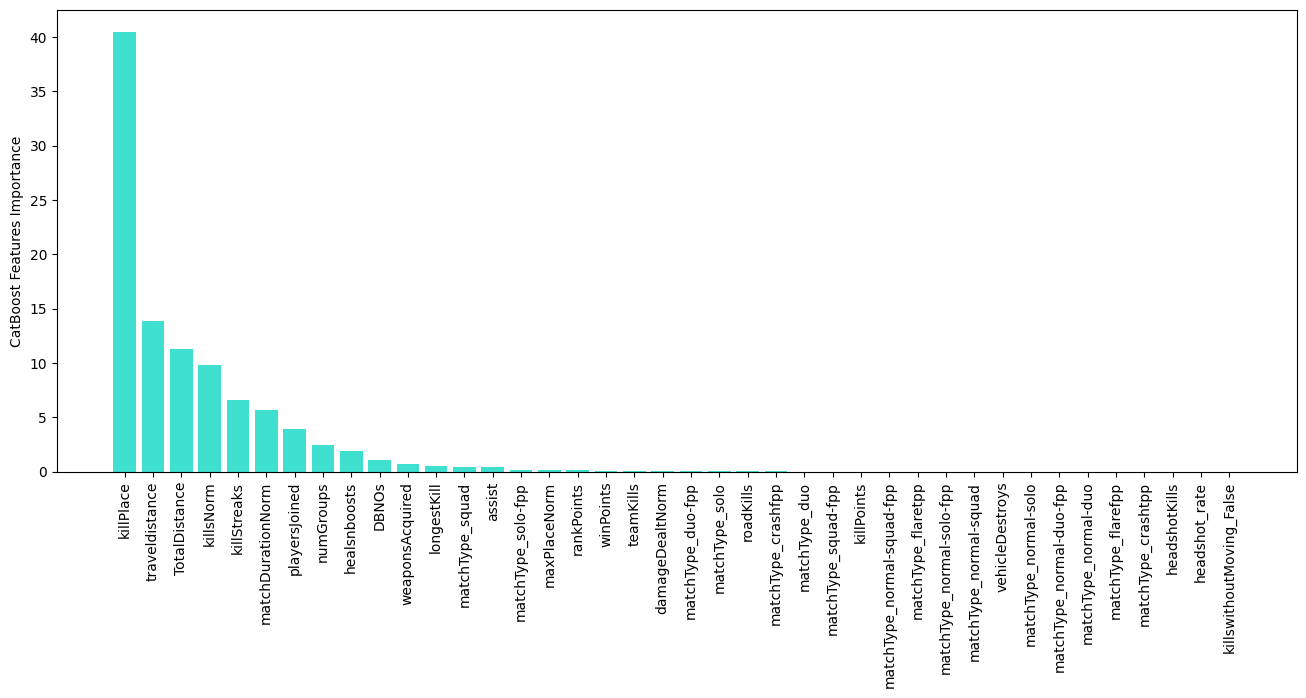

In [80]:
plt.bar(feature_importance_df.features,feature_importance_df.importance,color='turquoise')
plt.ylabel('CatBoost Features Importance')
plt.xticks(rotation=90)
plt.show()

## Prediction

In [81]:
pred=model.predict(xtest)

In [82]:
rmse=np.sqrt(mean_squared_error(ytest,pred))

In [84]:
r2=r2_score(ytest,pred)

In [86]:
print("Testing performance")
print("RMSE:{:.2f}".format(rmse))
print("R2:{:.2f}".format(r2))

Testing performance
RMSE:0.08
R2:0.93


<center><img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExdXFqczJ5NGg0MDV6NjZoa3Q0ZGJsbTU0bGoyZ2VpZWY4dDNybzlkcCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/oaO3QZ95F3NMjyKFmF/giphy.gif"></center>